In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
import seaborn as sns
from collections import Counter
import seaborn as sns

from utils import DataLoader, DataProcesser, label_plot

%load_ext autoreload
%autoreload 2

In [3]:
label_dic = {1: 'Still', 2: 'Walking', 3: 'Run', 4: 'Bike', 5: 'Car', 6: 'Bus', 7: 'Train', 8: 'Subway'}

# Data

In [4]:
with open('data/mid_res/data_detail_full.pickle', 'rb') as file:
    data = pickle.load(file)

In [5]:
# dp = DataProcesser.DataProcesser(data)
# dp.process_pipe()

In [6]:
# data.df.to_csv("data/mid_res/data_ft_v1.csv", header = True, index = False)

In [7]:
data.df = pd.read_csv('data/mid_res/data_ft_v1.csv')
dp = DataProcesser.DataProcesser(data)
dp.process_data_window()

In [5]:
# data.df.to_csv("data/mid_res/20210525_data_df.csv", header = True, index = False)
data.df = pd.read_csv("data/mid_res/20210525_data_df.csv")

# Feature

In [63]:
list(data.df)

['time',
 'label',
 'accuracy',
 'latitude',
 'longitude',
 'altitude',
 'num_gps',
 'num_wifi',
 'num_cells',
 'time_dlt',
 'valid_dlt',
 'east',
 'north',
 'east_dlt',
 'north_dlt',
 'east_speed',
 'north_speed',
 'speed',
 'speed_dif',
 'speed_dlt',
 'acc',
 'wifi_rssi_mode',
 'wifi_rssi_mean',
 'wifi_rssi_min',
 'wifi_rssi_max',
 'wifi_rssi_std',
 'wifi_freq_5ratio',
 'cells_ctype_mode',
 'cells_isRegistered_mean',
 'cells_asuLevel_mean',
 'cells_dbm_mean',
 'cells_level_mean',
 'cells_asuLevel_min',
 'cells_dbm_min',
 'cells_level_min',
 'cells_asuLevel_max',
 'cells_dbm_max',
 'cells_level_max',
 'cells_asuLevel_std',
 'cells_dbm_std',
 'gps_snr_mean',
 'gps_snr_min',
 'gps_snr_max',
 'gps_snr_std',
 'speed_log',
 'acc_wd_std',
 'speed_wd_std',
 'have_loc',
 'have_gps',
 'have_wifi',
 'have_cells',
 'speed_level',
 'speed_wd_max_log',
 'accuracy_level']

In [6]:
data.df['have_loc'] = data.df.apply(lambda x: 1 if x['accuracy'] > -1 else 0, axis = 1)
data.df['have_gps'] = data.df.apply(lambda x: 1 if x['num_gps'] > -1 else 0, axis = 1)
data.df['have_wifi'] = data.df.apply(lambda x: 1 if x['num_wifi'] > -1 else 0, axis = 1)
data.df['have_cells'] = data.df.apply(lambda x: 1 if x['num_cells'] > -1 else 0, axis = 1)

In [29]:
data.df['speed_level'] = pd.cut(data.df['speed'], [float('-inf'), 1, 20, float('inf')], labels = [0, 1, 2]).cat.add_categories(-1).fillna(0).astype('int')

In [32]:
data.df['accuracy_level'] = pd.cut(data.df['accuracy'], [float('-inf'), 5, 10, float('inf')], labels = [0, 1, 2]).cat.add_categories(-1).fillna(0).astype('int')

In [7]:
# data.df['is_stop'] = data.df.apply(lambda x: 1 if x['speed'] < 1 else 0, axis = 1)
# data.df['high_speed'] = data.df.apply(lambda x: 1 if x['speed'] > 20 else 0, axis = 1)
data.df['speed_wd_max_log'] = np.log(data.df['speed']+1).rolling(20, center = True).max().fillna(method = 'ffill').fillna(method = 'bfill')

In [53]:
data.df.groupby(['label']).mean()[['have_loc', 'have_gps', 'have_wifi', 'have_cells', 'accuracy_level']]

,have_loc,have_gps,have_wifi,have_cells,accuracy_level
label,,,,,
1,0.420463,0.918513,0.982404,0.884523,0.319319
2,0.858919,0.998086,0.983790,0.898433,0.677272
3,0.991414,0.998013,0.984530,0.897270,0.613658
4,0.986346,0.998467,0.984634,0.875898,0.799409
5,0.772167,0.801185,0.983043,0.983030,0.651741
6,0.842294,0.963895,0.984066,0.892808,0.738328
7,0.442756,0.761814,0.984276,0.816697,0.419717
8,0.295697,0.961035,0.984234,0.817390,0.275241


In [35]:
Counter(data.df.accuracy_level)

Counter({0: 432170, 2: 220854, 1: 327503})

In [62]:
t = np.array(data.df.groupby(['label', 'accuracy_level']).count()['time'].reset_index(drop = True)).reshape(3, -1)
pd.DataFrame(t, columns = list(label_dic.values()))/pd.DataFrame(t, columns = list(label_dic.values())).sum(axis = 0)

,Still,Walking,Run,Bike,Car,Bus,Train,Subway
0,0.601816,0.228642,0.091591,0.472125,0.398326,0.099260,0.233769,0.276121
1,0.030196,0.235294,0.394566,0.288560,0.330028,0.378822,0.582748,0.470368
2,0.367988,0.536064,0.513844,0.239315,0.271647,0.521918,0.183483,0.253511


In [ ]:
# label_plot.plot_label(data.df, col_name)

In [33]:
col_have = 'have_loc'
col_name = 'accuracy'
df_plot = data.df[(data.df[col_have] == 1)]

In [ ]:
data.df['accuracy_level'] = 1
data.df['accuracy_level'][data.df['accuracy'] > ]

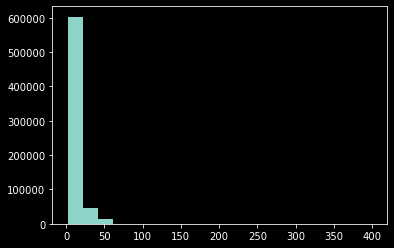

In [51]:
t = df_plot[(df_plot.label == 3)][col_name]
t = df_plot[col_name]
plt.hist(t, bins = 20);

In [48]:
Counter(t)

Counter({6.0: 14619,
         4.0: 14181,
         16.0: 2294,
         8.0: 7144,
         12.0: 1366,
         32.0: 262,
         5.0: 3,
         3.0: 1789,
         24.0: 197,
         96.0: 1,
         48.0: 55,
         400.0: 1,
         14.0: 1})

In [28]:
# sns.displot(t, kde = False)

In [64]:
# label_plot.box_label(df_plot, col_name, use_log = False, violin = True)

In [66]:
# label_plot.box_label(df_plot, 'acc_wd_std', use_log = True, violin = False)

In [65]:
# plt.figure(figsize = [12, 8])
# plt.subplot(1, 2, 1)
# plt.scatter(range(8), data.df[['label', col_name]].groupby('label').mean())
# plt.xticks(range(8), list(label_dic.values()));
# plt.subplot(1, 2, 2)
# data.df['tmp'] = data.df[['label', col_name]].rolling(10).std()[col_name]
# plt.scatter(range(8), data.df[['label', 'tmp']].groupby('label').std())
# plt.xticks(range(8), list(label_dic.values()));